# EDA Template

In [1]:
!pip install wget
!pip install sweetviz
!pip install ipywidgets
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install statsmodels
!pip install xgboost
!pip install sklearn
!pip install shap

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sweetviz as sv

import wget

In [2]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
#bike_sharing_data_file = wget.download(url)

In [3]:
#with zipfile.ZipFile(bike_sharing_data_file, 'r') as zip_ref:
#    zip_ref.extractall()

In [3]:
daily_col_types = {'instant':'int', 'dteday':'str', 'season':'int', 'yr':'int', 'mnth':'int',
'holiday':'bool', 'weekday':'int', 'workingday':'bool', 'weathersit':'int', 'temp':'float',
'atemp':'float', 'hum':'float', 'windspeed':'float', 'casual':'int', 'registered':'int', 'cnt':'int'}

In [4]:
daily_data = pd.read_csv('day.csv', dtype = daily_col_types, parse_dates = ['dteday'])

In [5]:
daily_data.describe()

,instant,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,2.004787,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#Checking duplicates
daily_data[daily_data.duplicated(keep='first')].head()
daily_data.drop_duplicates(inplace=True)

In [ ]:
#Checking missing values
daily_data.isnull().sum()

In [10]:
#Handling missing values
#daily_data.dropna()
#daily_data.loc[:,'temp'].fillna(0, inplace=True)
#daily_data.assign(temp = lambda x: x.temp.fillna(x.temp.median()))

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



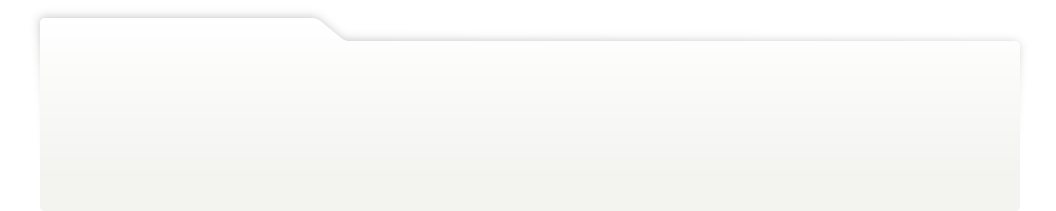
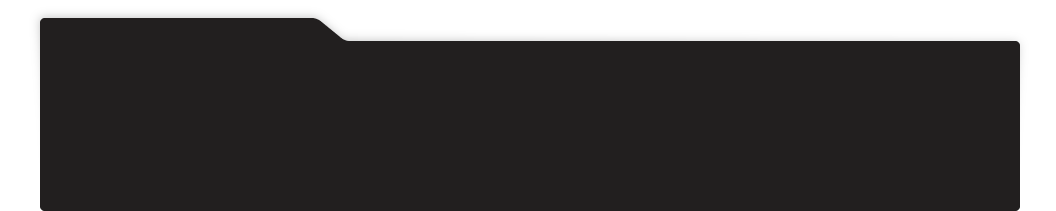
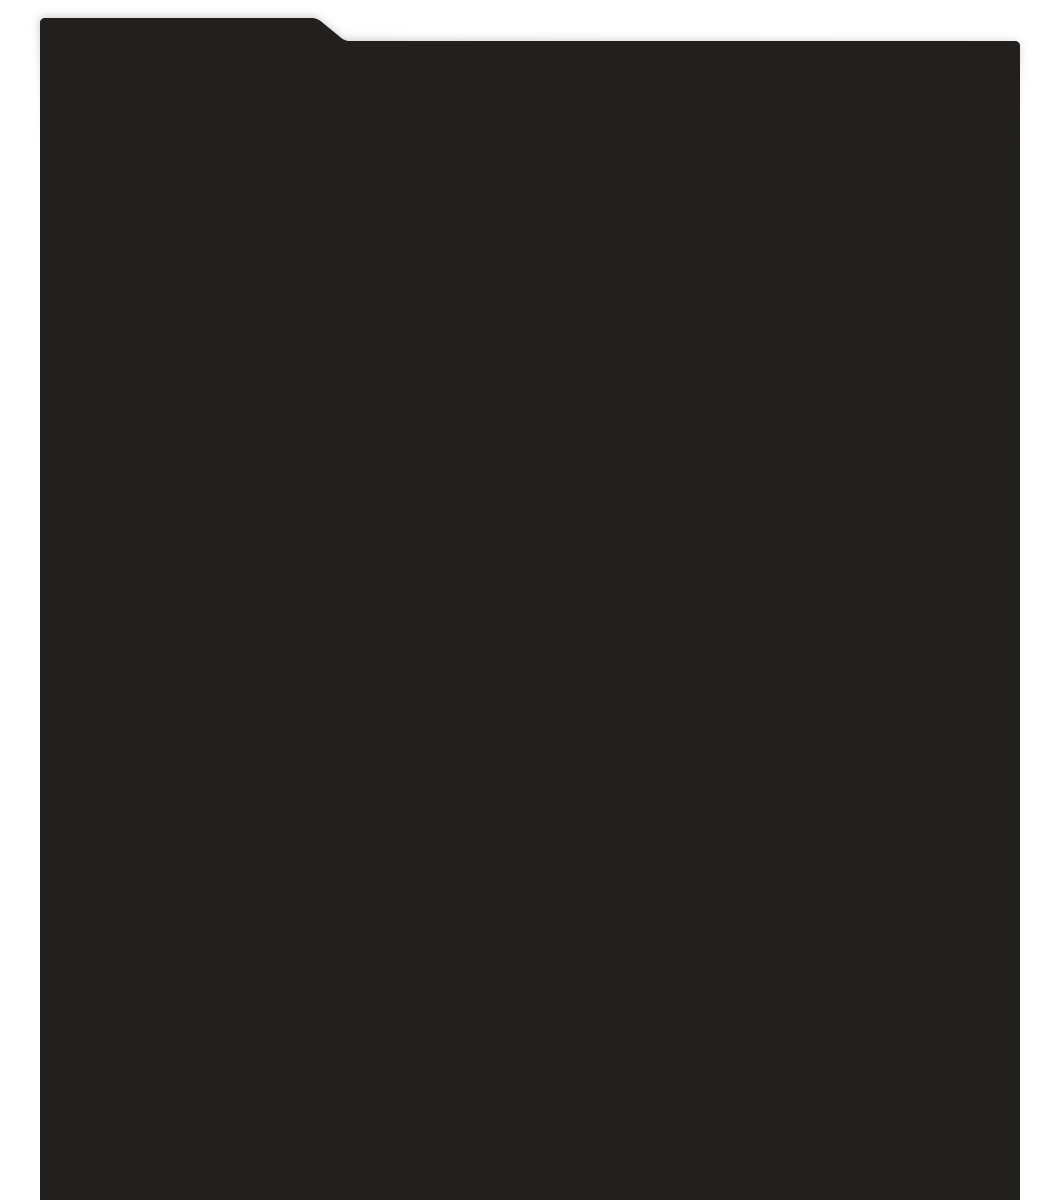
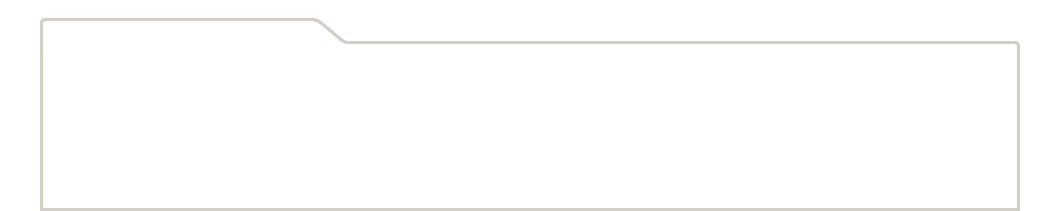
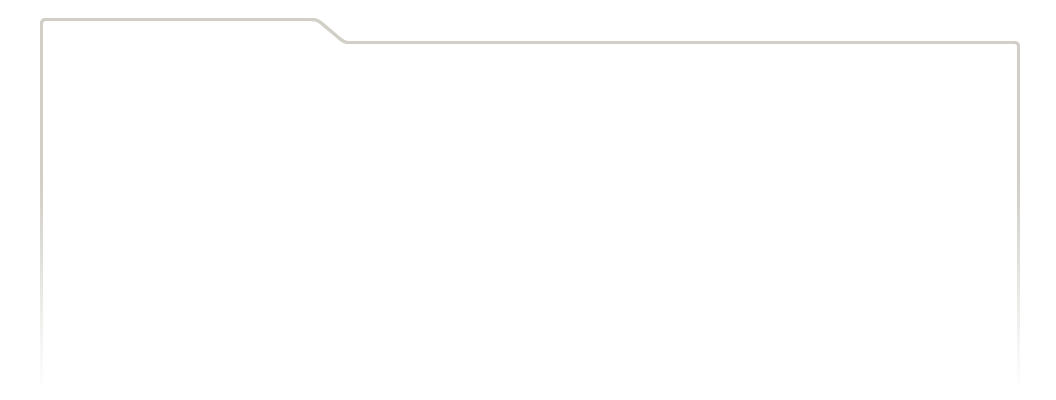
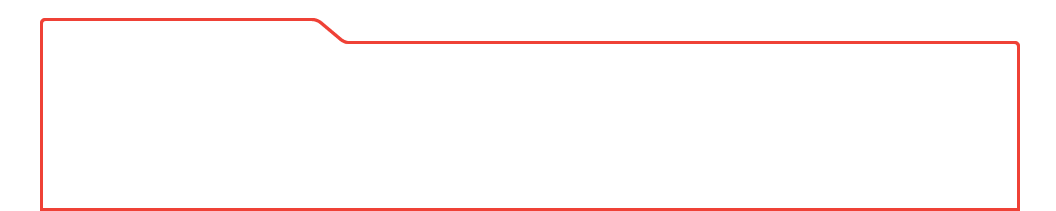
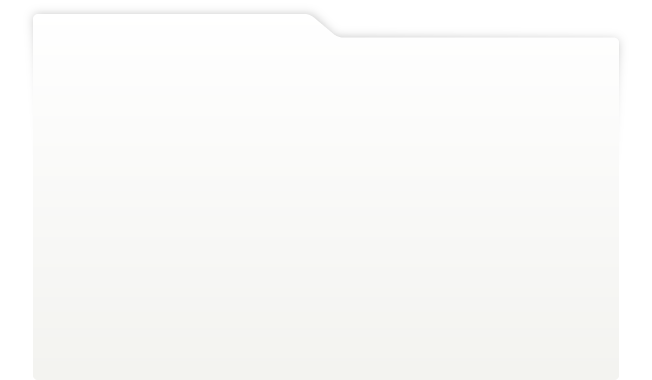
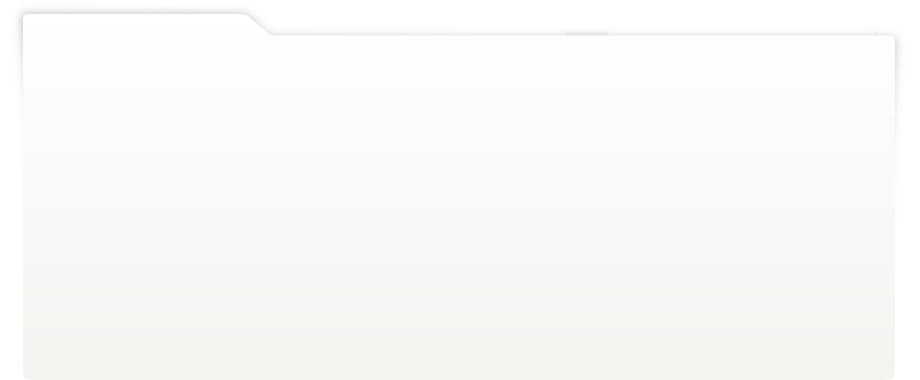
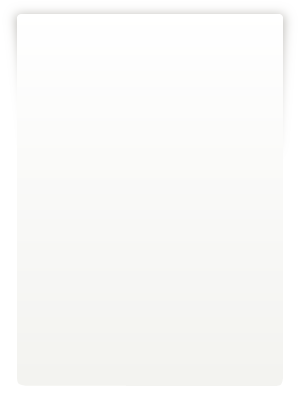
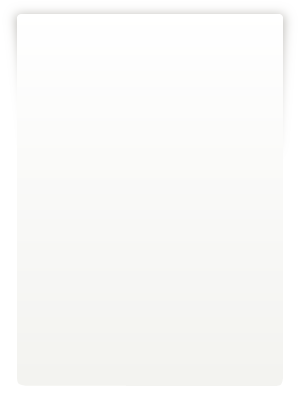
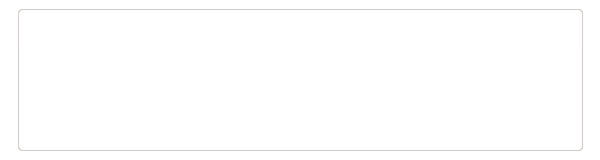
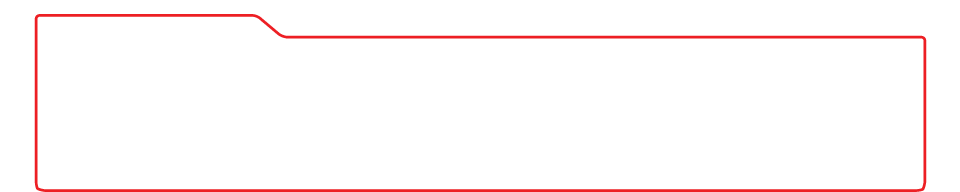
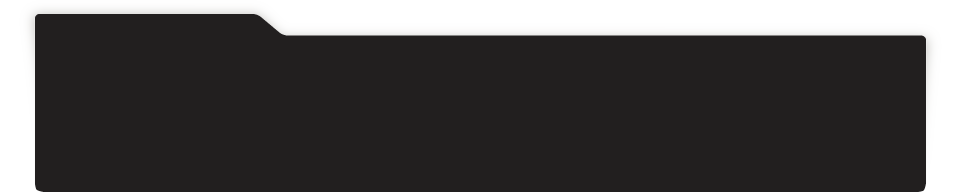
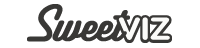
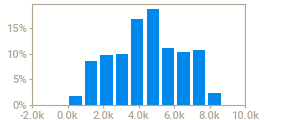
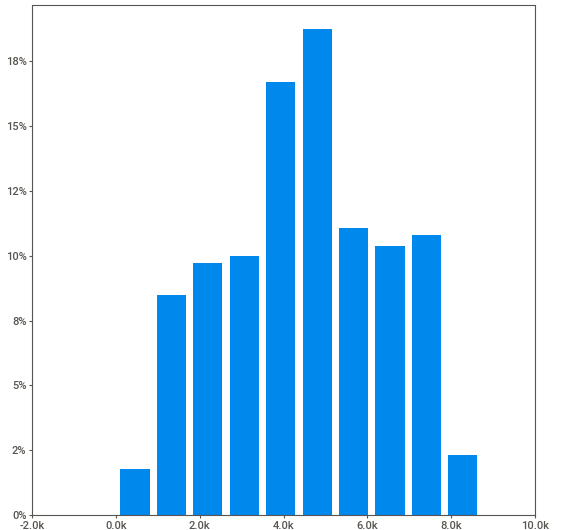
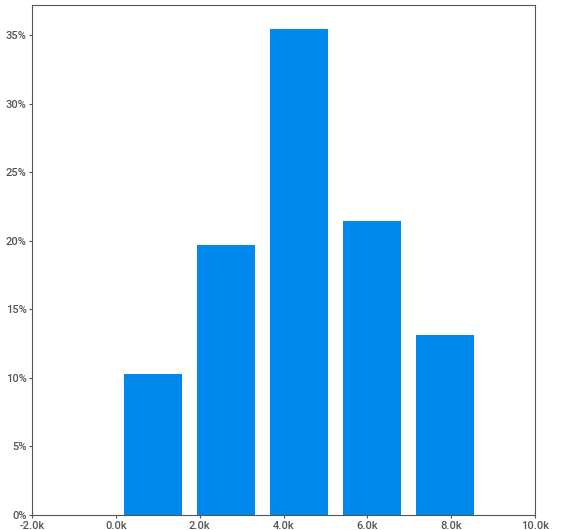
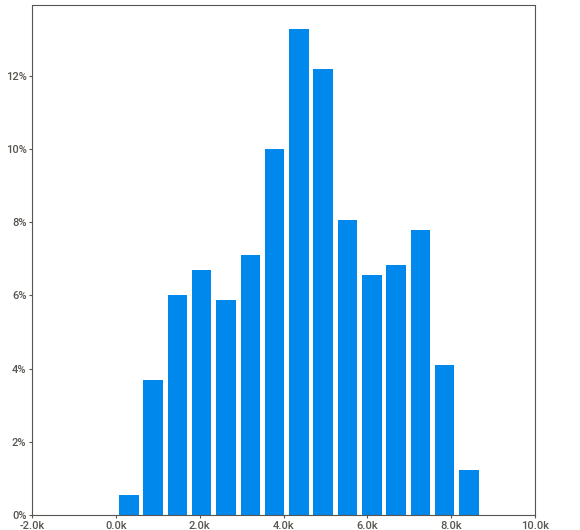
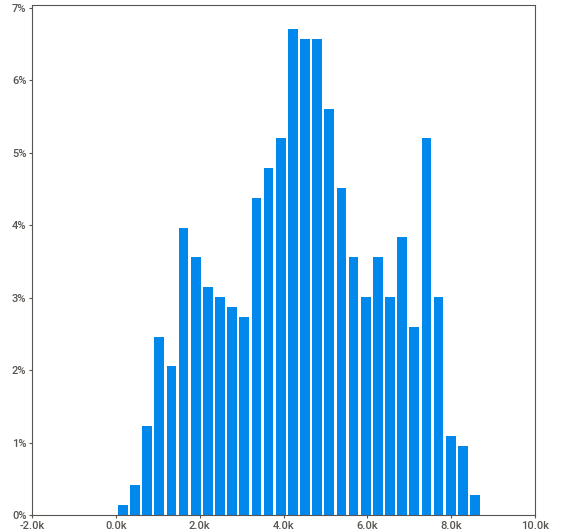
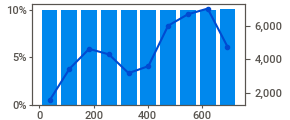
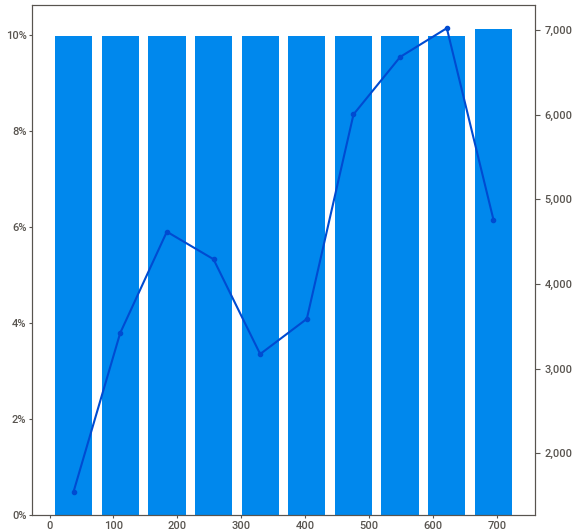
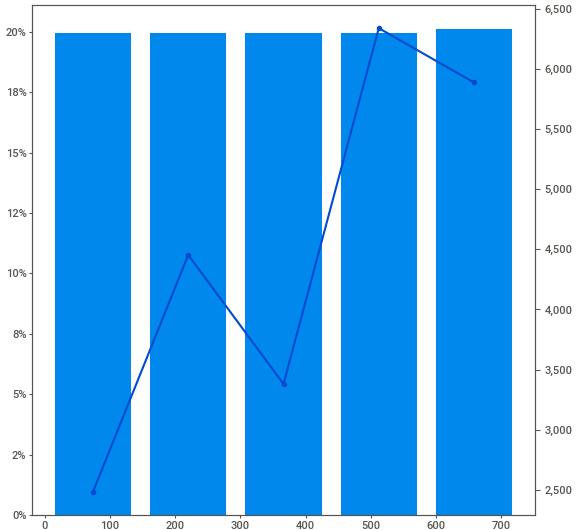
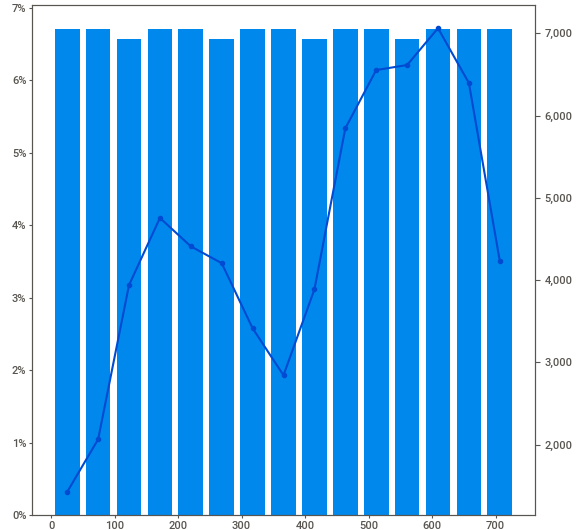
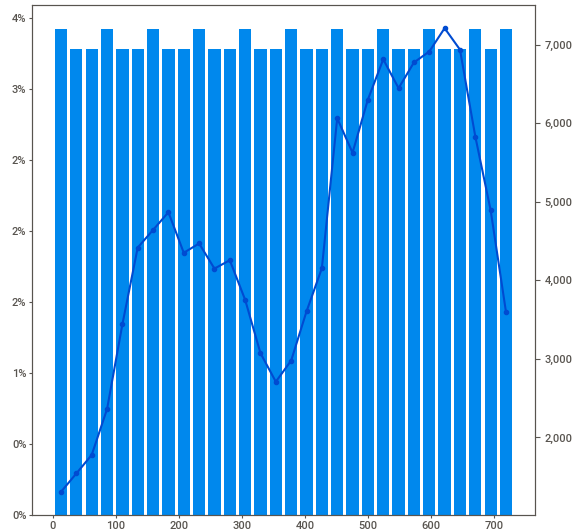
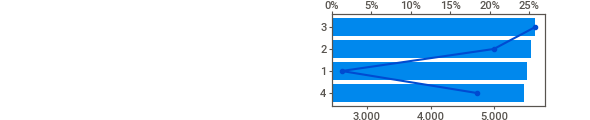
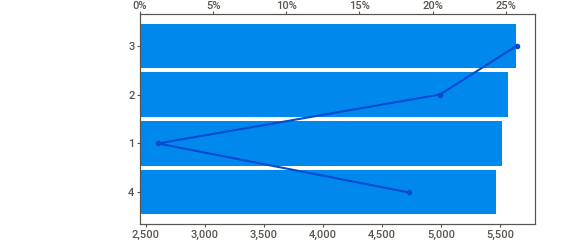
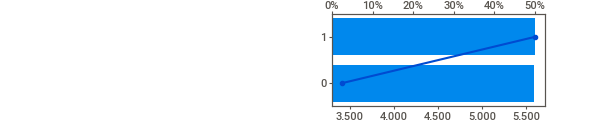
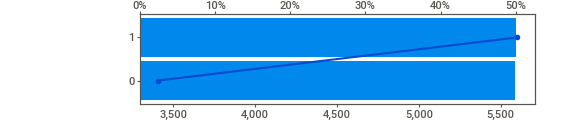
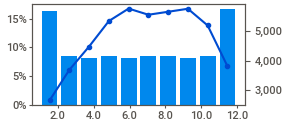
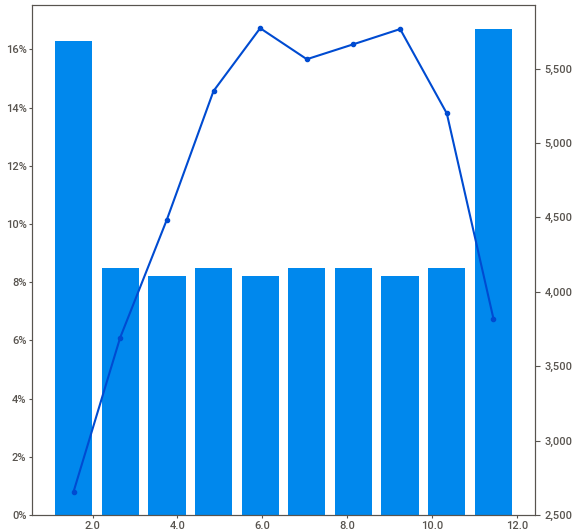
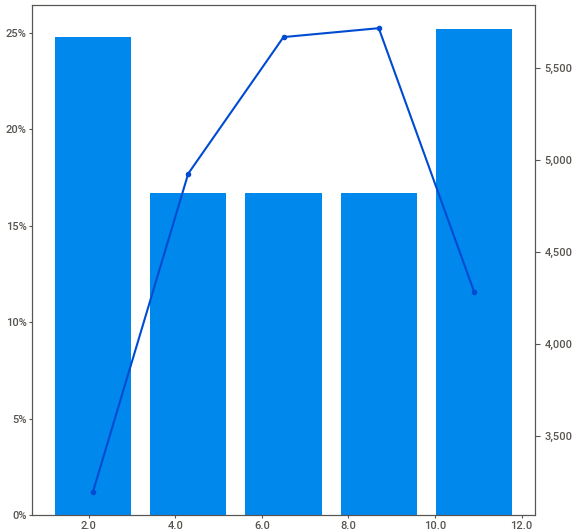
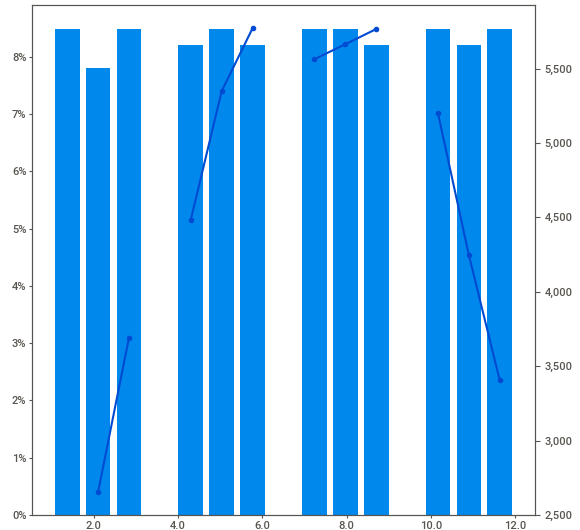
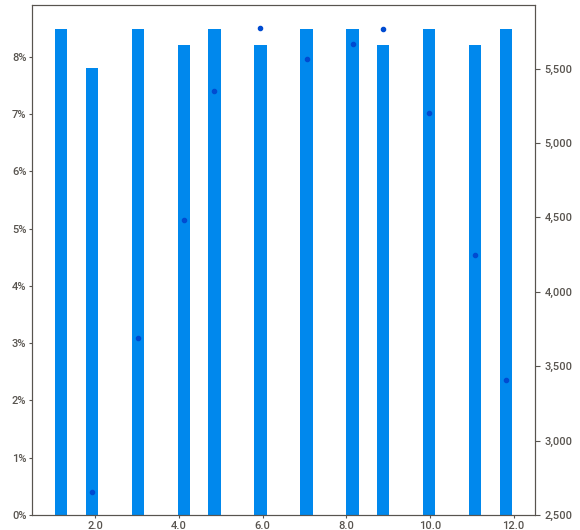
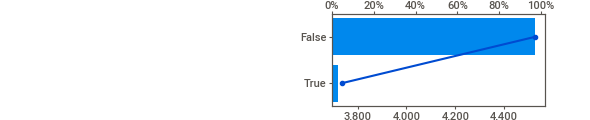
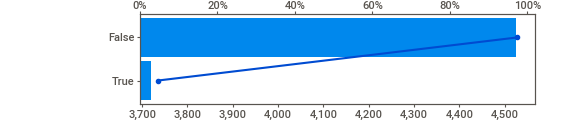
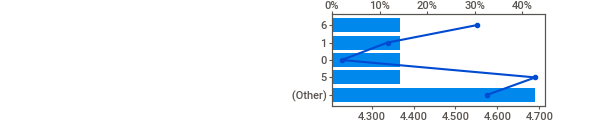
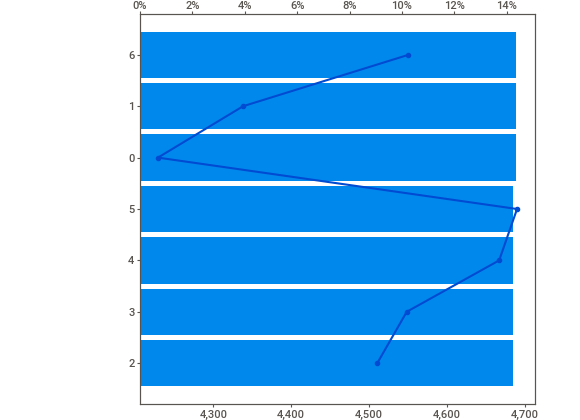
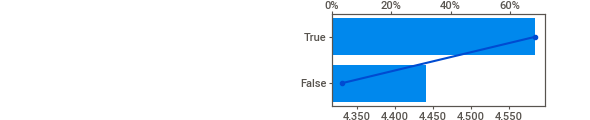
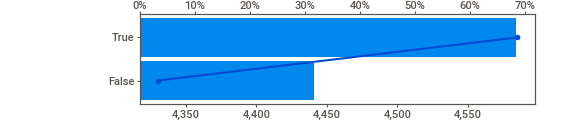
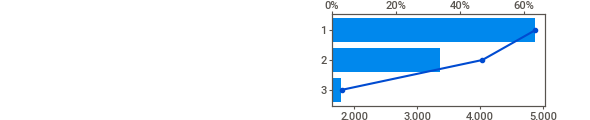
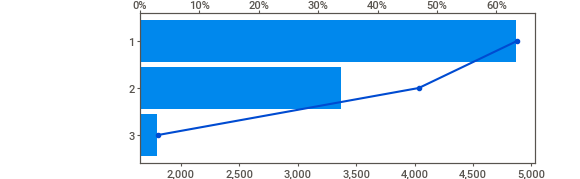
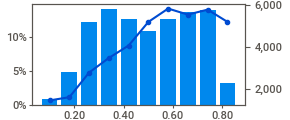
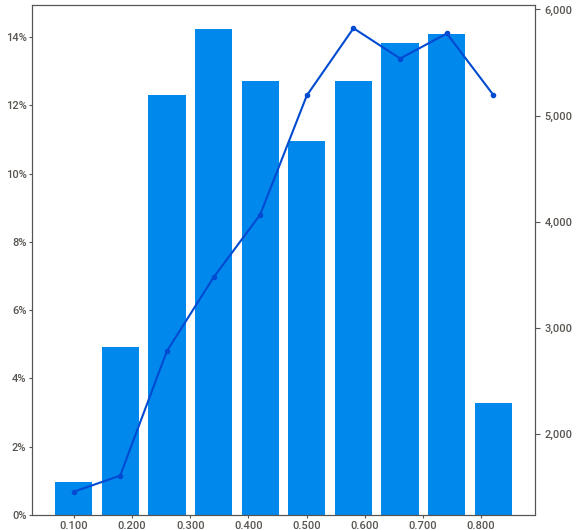
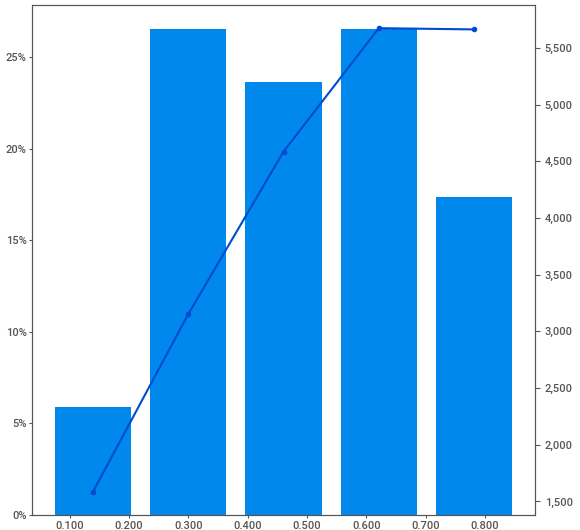
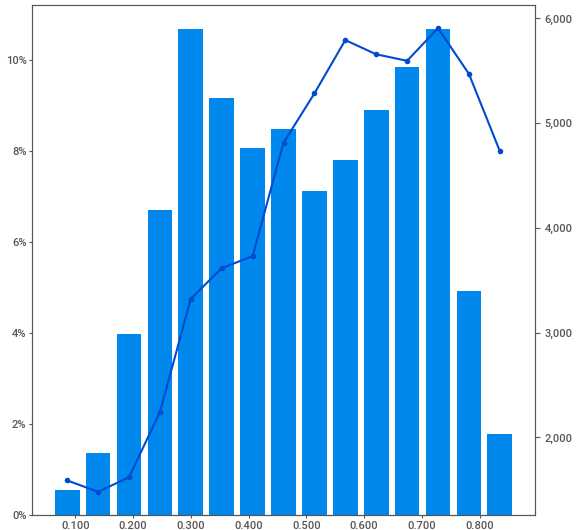
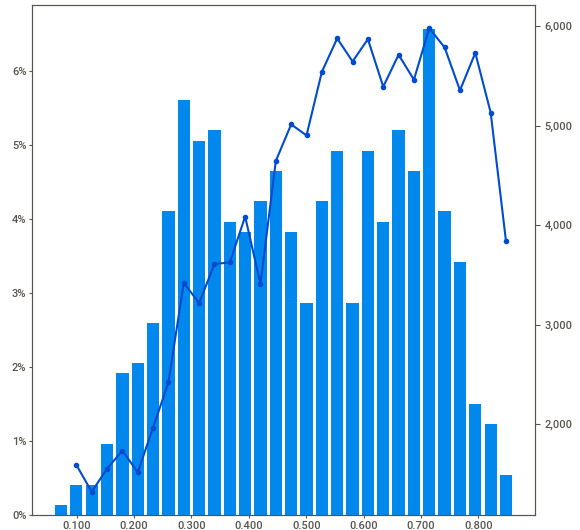
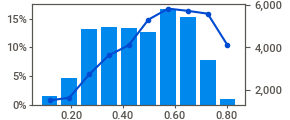
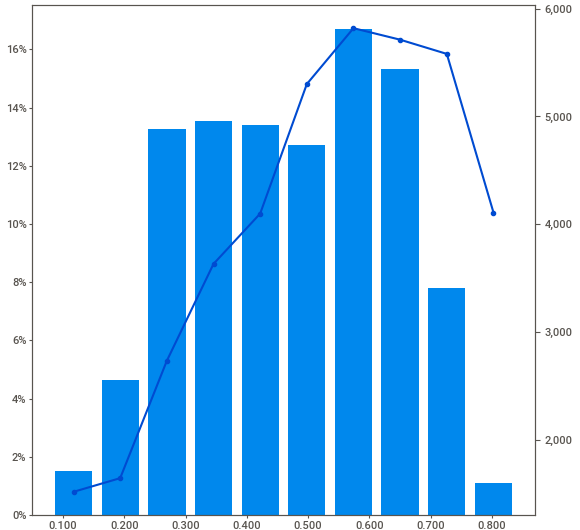
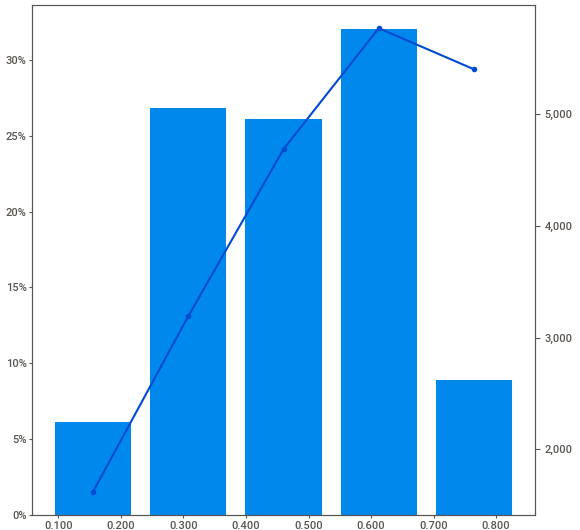
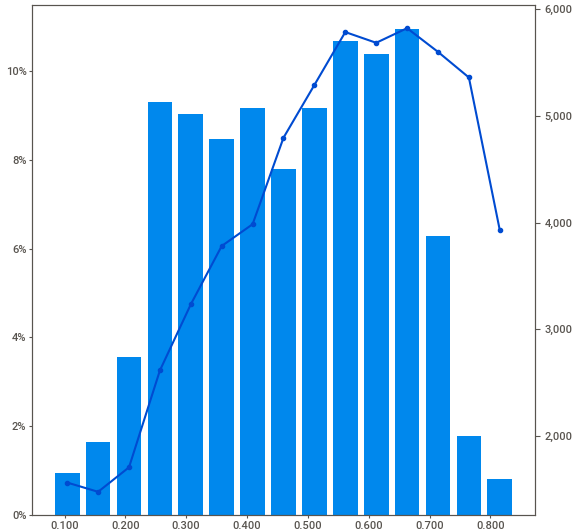
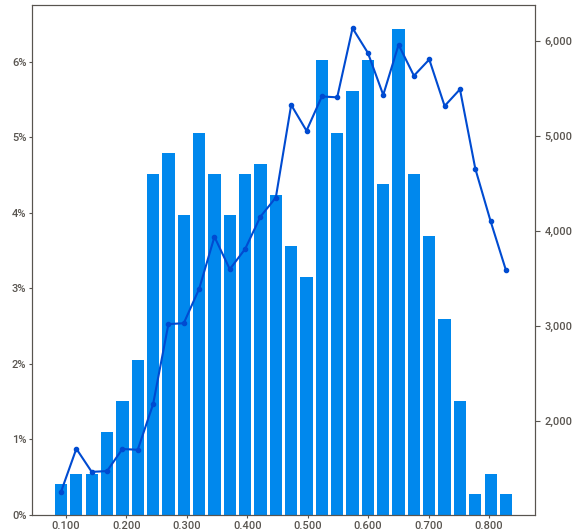
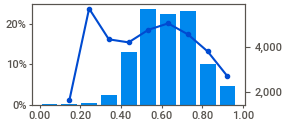
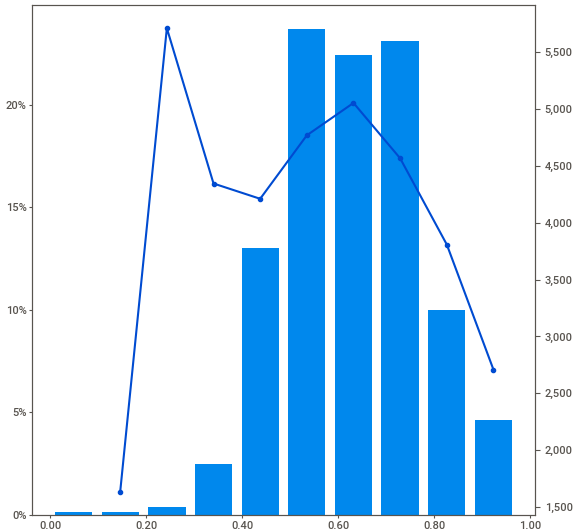
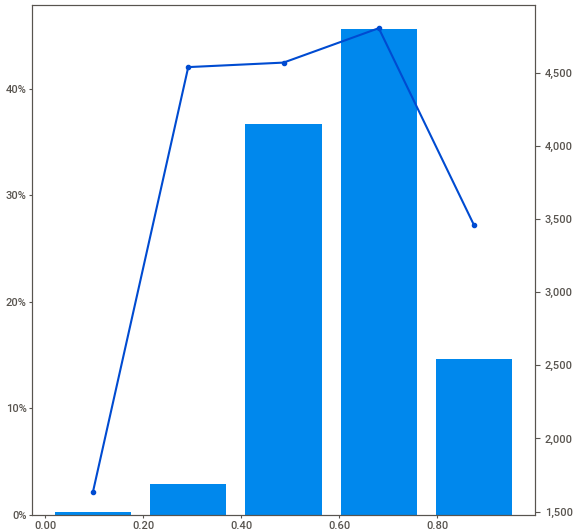
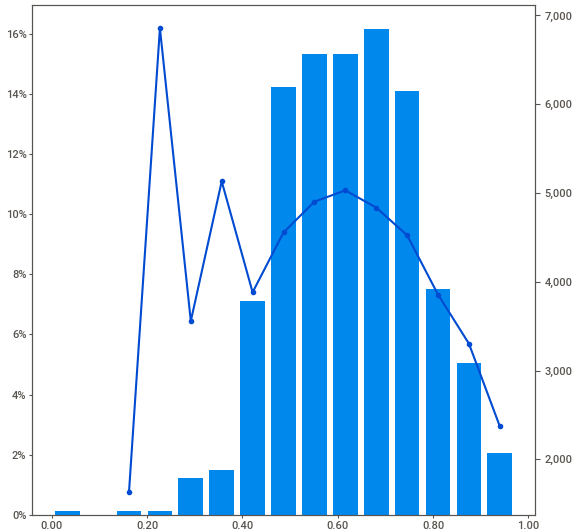
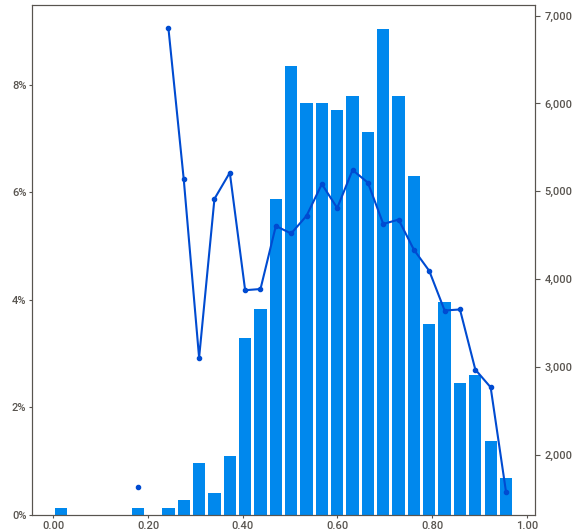
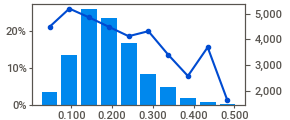
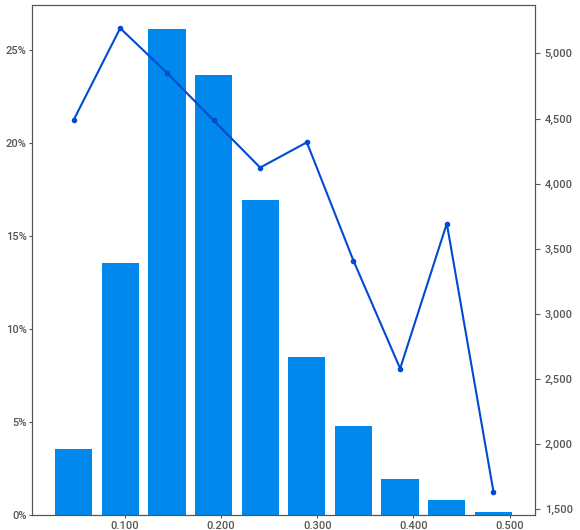
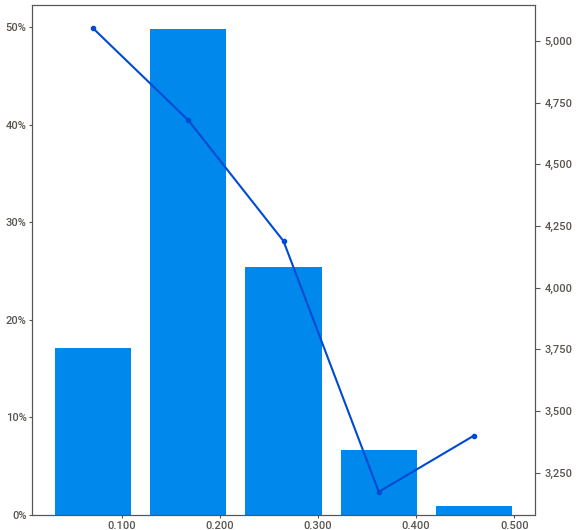
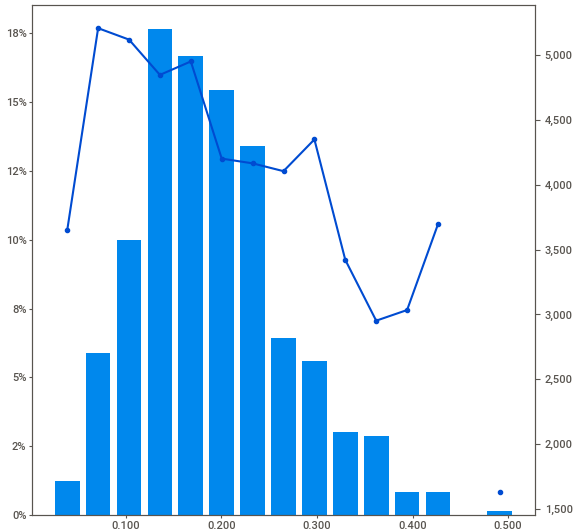
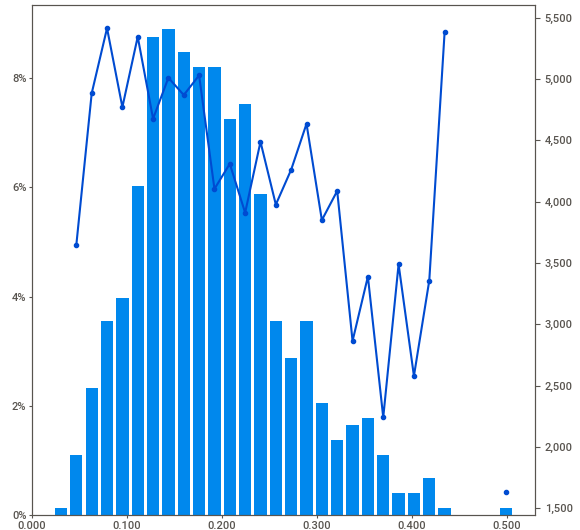
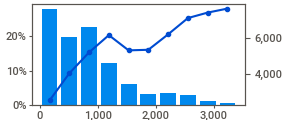
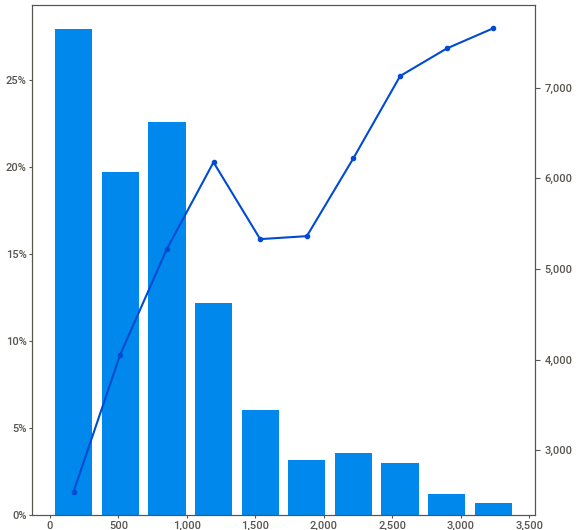
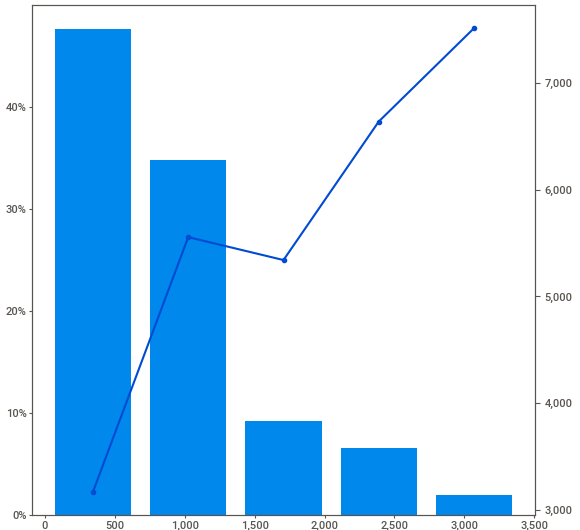
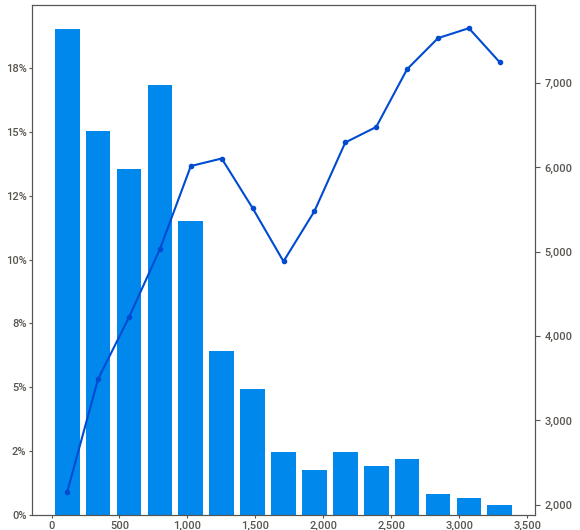
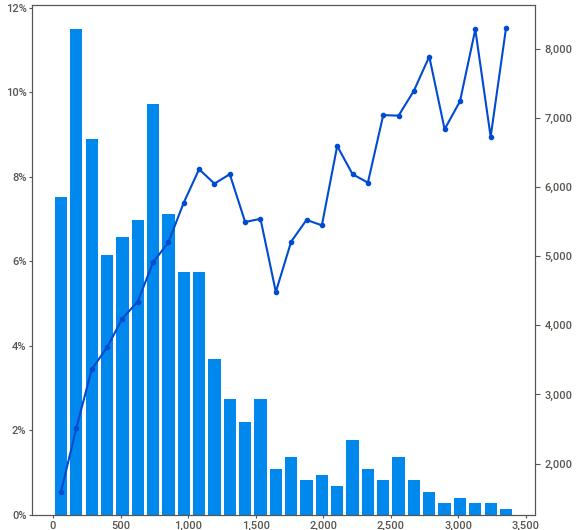
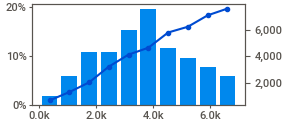
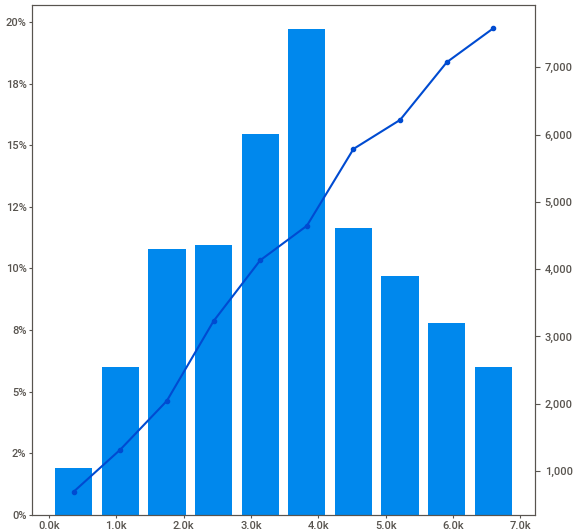
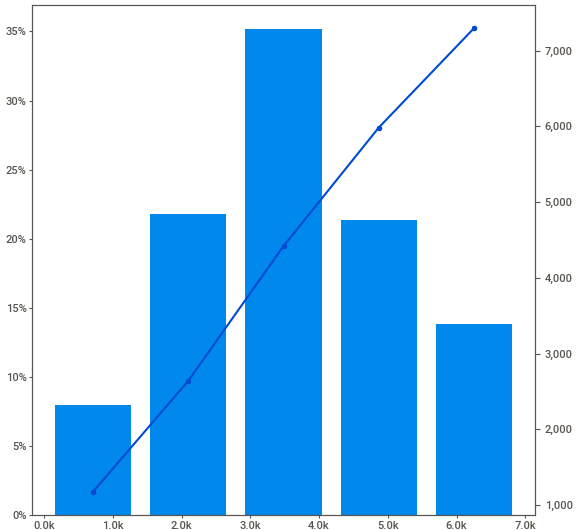
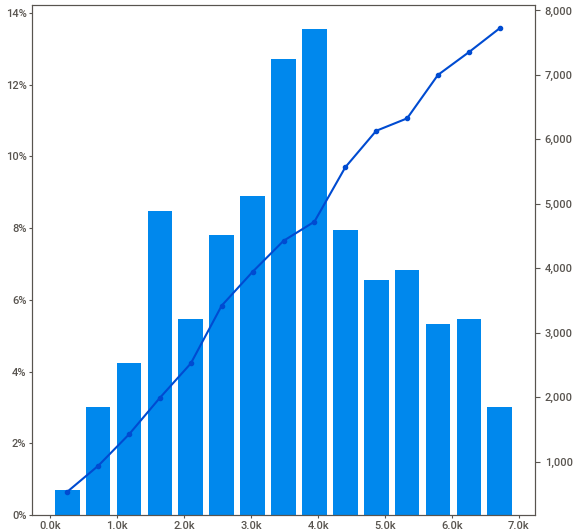
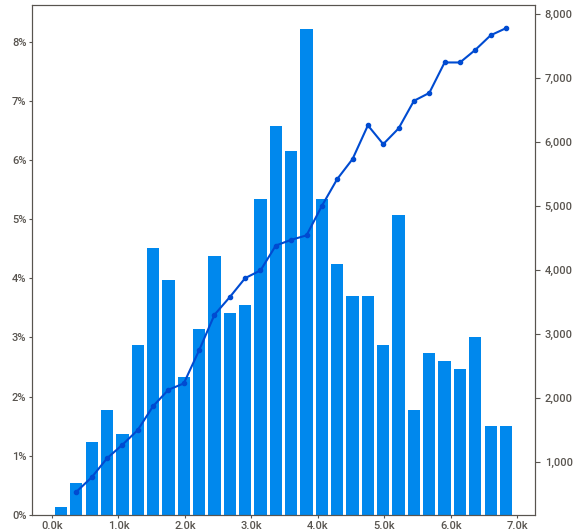
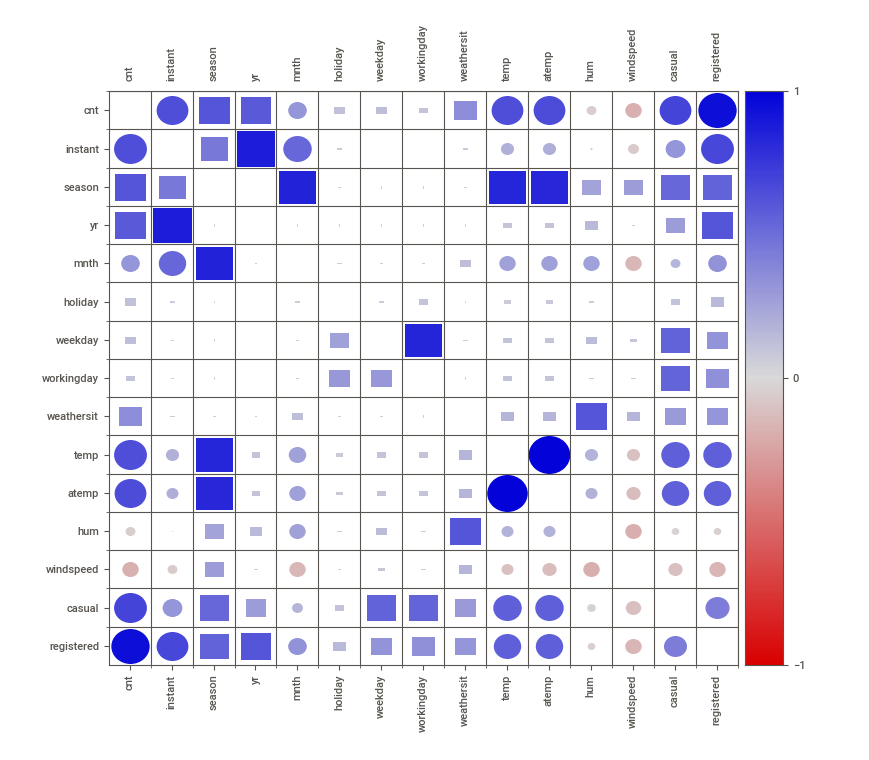
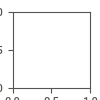

In [11]:
sv_report = sv.analyze(daily_data, target_feat = 'cnt')
sv_report.show_notebook()

In [12]:
#Template for histograms
#daily_data[['cnt', 'casual', 'registered']].hist(figsize=(10,10))

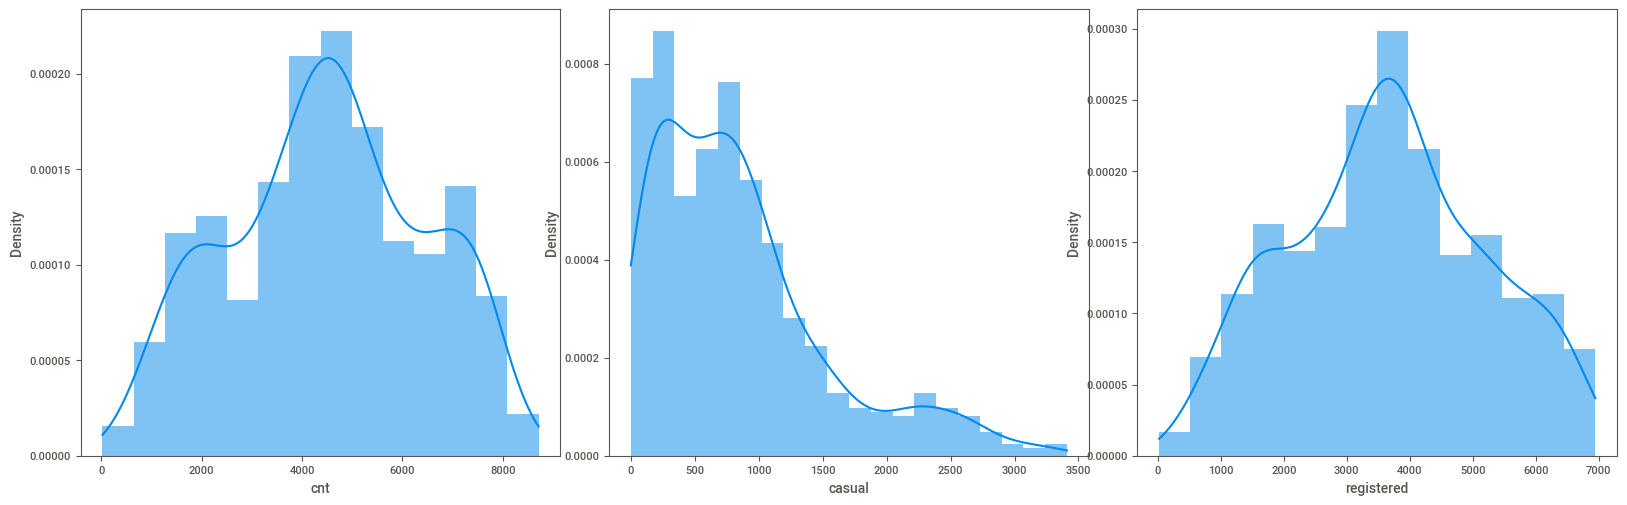

In [13]:
# Simple distribution
f, axes = plt.subplots(1, 3, figsize=(16,5))
f.tight_layout()

for i, feature in enumerate(['cnt', 'casual', 'registered']):
    sns.histplot(daily_data[feature], ax=axes[i], kde=True, stat="density", linewidth=0)


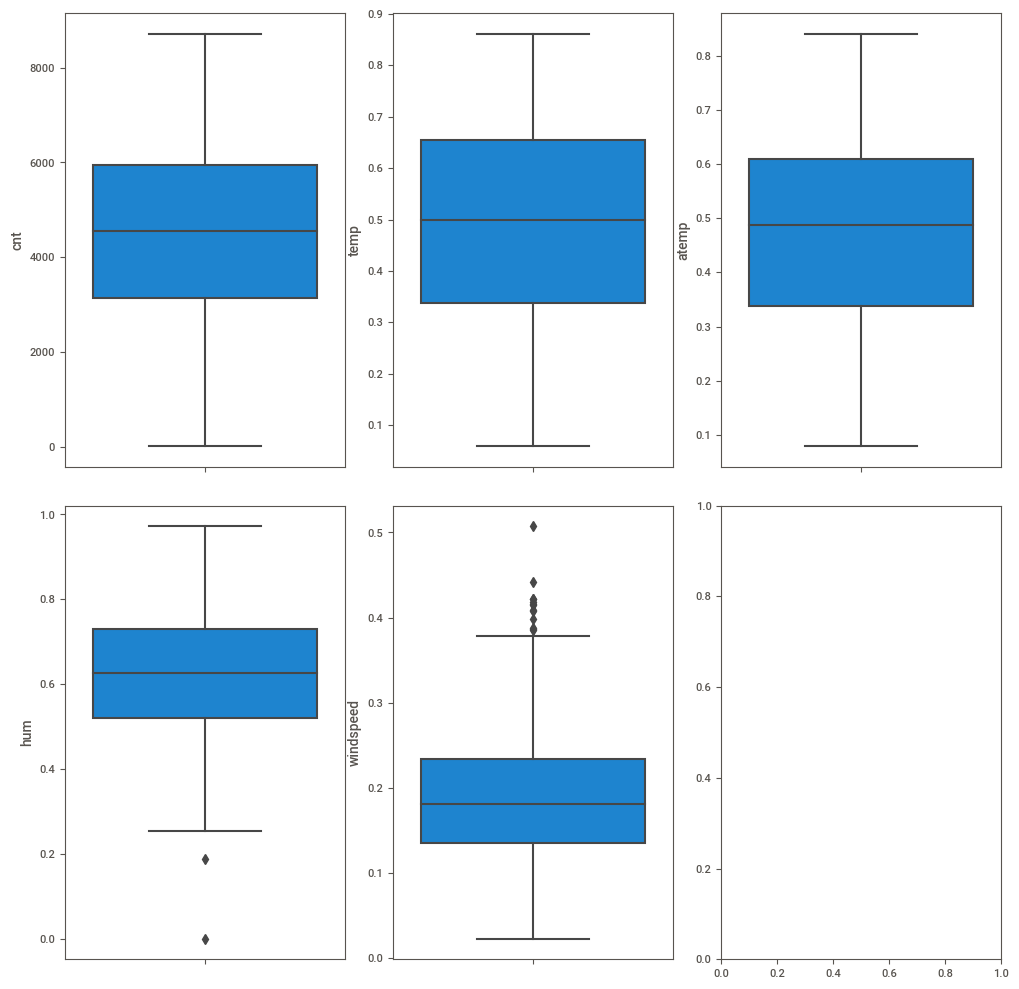

In [14]:
# Simple box-plots
f, axes = plt.subplots(2, 3, figsize=(10,10))
f.tight_layout()
f_names = [
            ['cnt', 'temp', 'atemp'],
            ['hum', 'windspeed']
          ]

for i, f_list in enumerate(f_names):
    for j, feature in enumerate(f_list):
        sns.boxplot(y = daily_data[feature], ax=axes[i, j], orient = 'v')

In [15]:
# Correlation matrix
corr = daily_data[['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']].corr()
corr.style.background_gradient(cmap='coolwarm')

,cnt,casual,registered,temp,atemp,hum,windspeed
cnt,1.000000,0.672804,0.945517,0.627494,0.631066,-0.100659,-0.234545
casual,0.672804,1.000000,0.395282,0.543285,0.543864,-0.077008,-0.167613
registered,0.945517,0.395282,1.000000,0.540012,0.544192,-0.091089,-0.217449
temp,0.627494,0.543285,0.540012,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.543864,0.544192,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,-0.077008,-0.091089,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.167613,-0.217449,-0.157944,-0.183643,-0.248489,1.000000


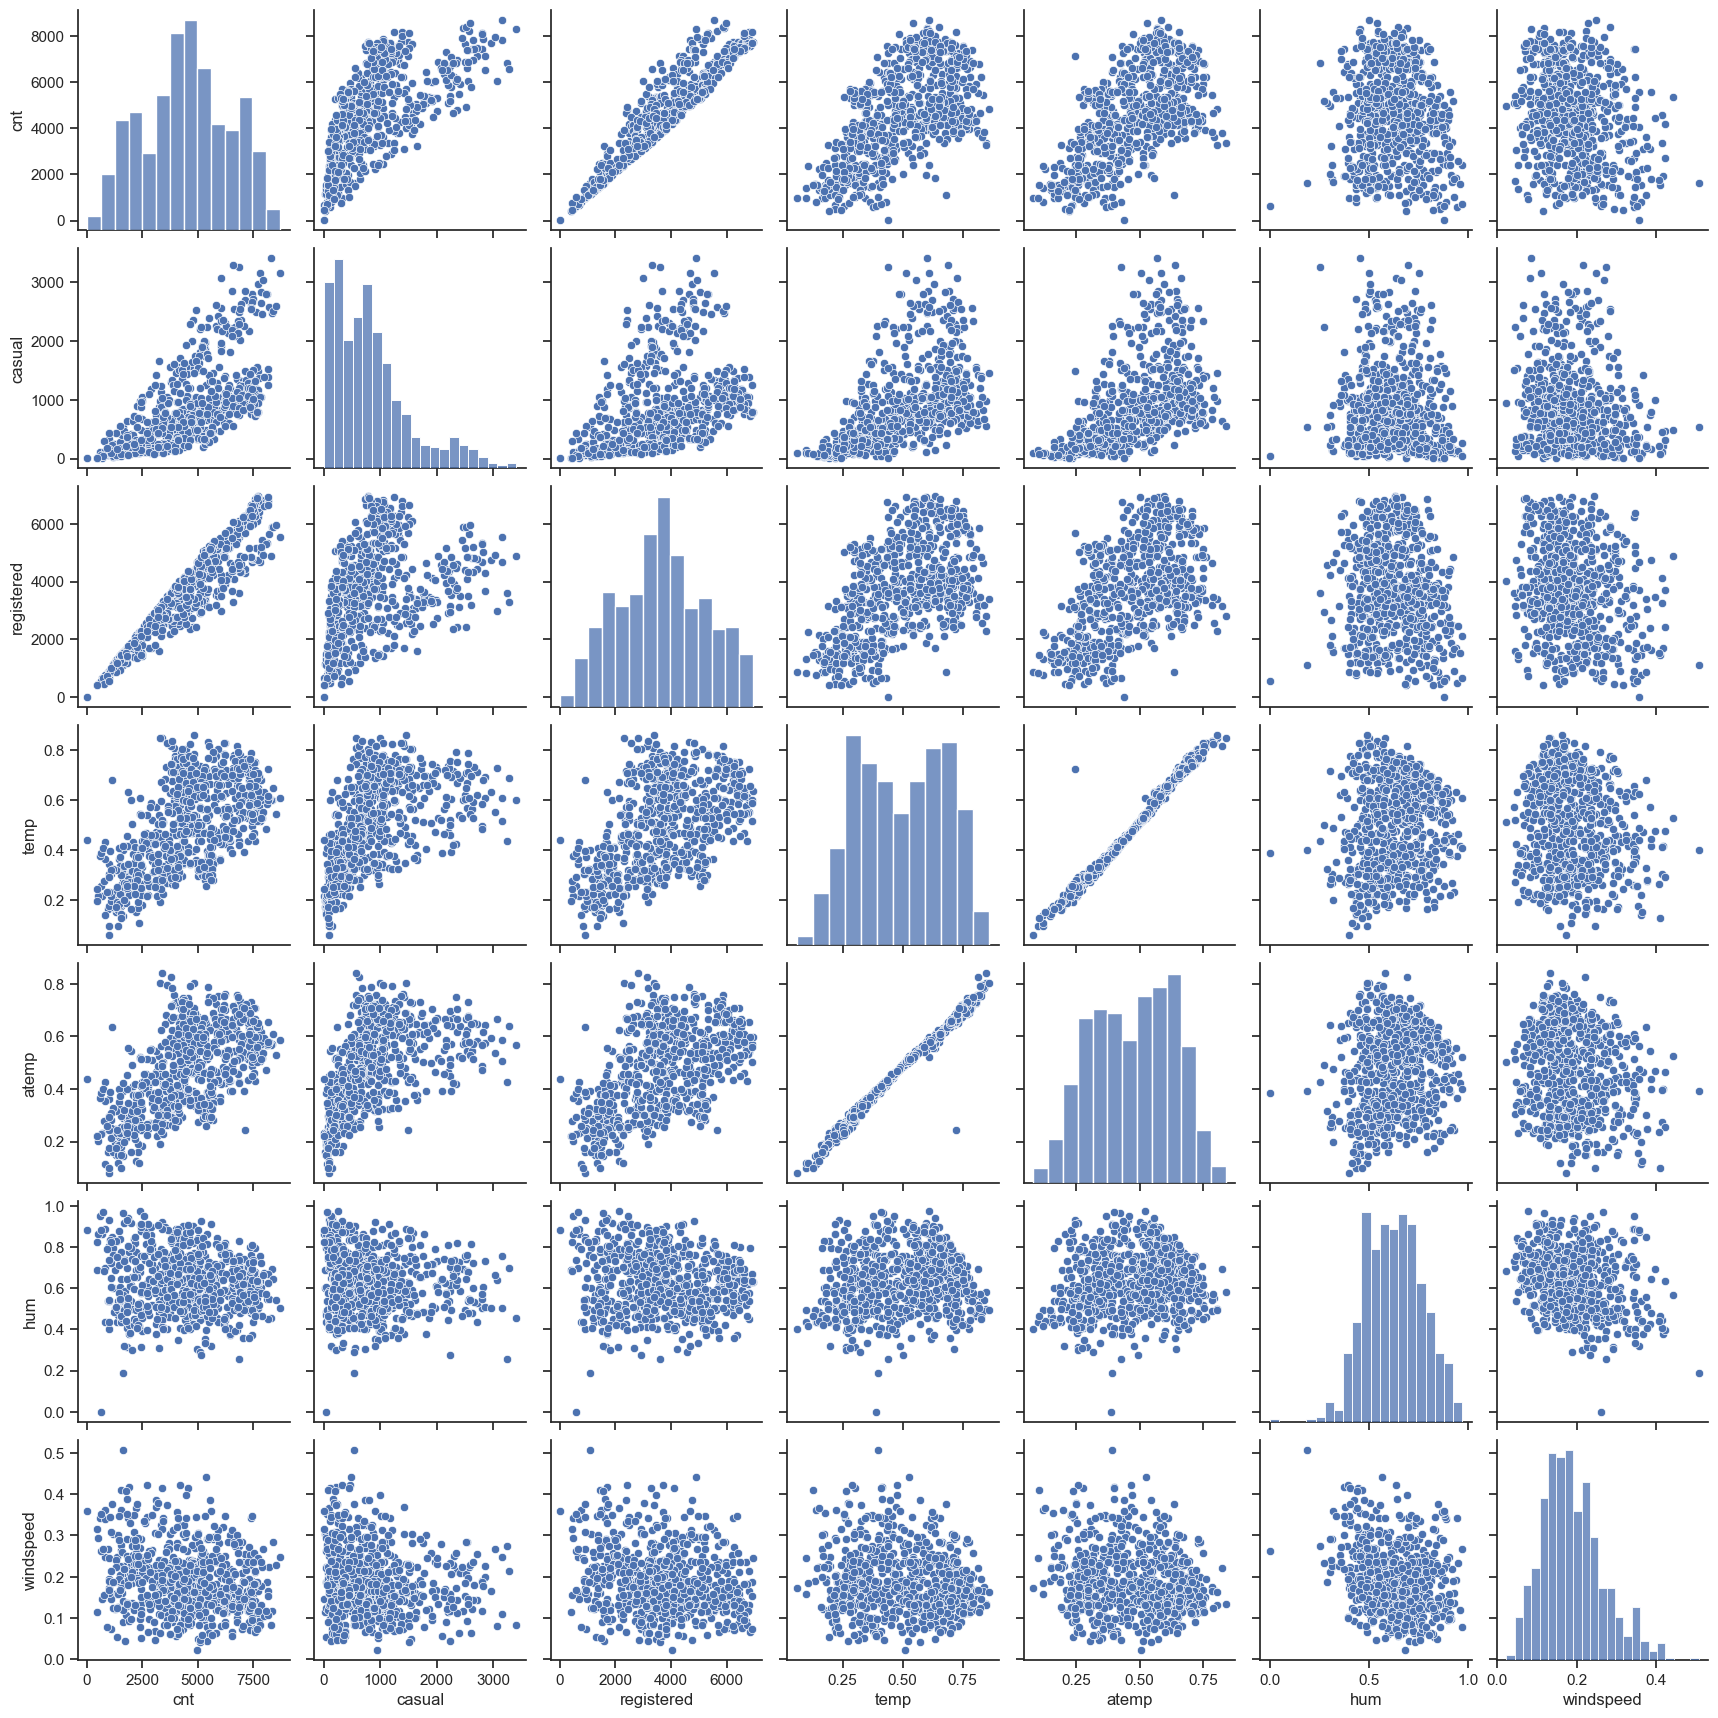

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(daily_data[['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']])

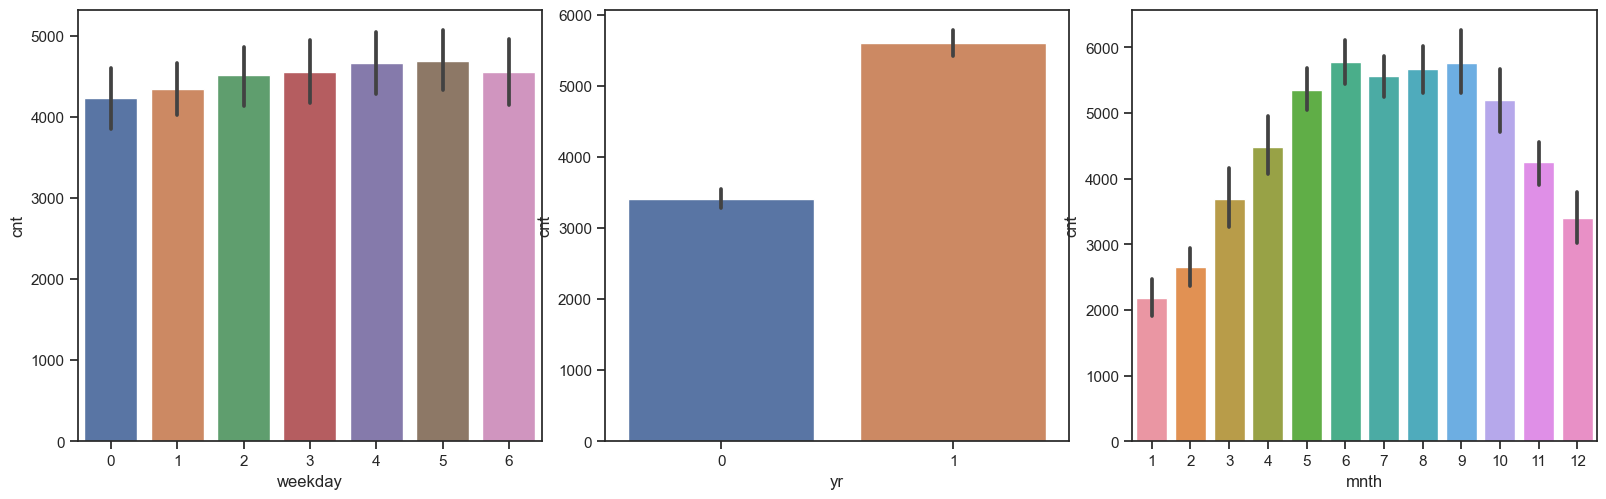

In [17]:
f, axes = plt.subplots(1, 3, figsize=(16,5))
f.tight_layout()

for i, feature in enumerate(['weekday', 'yr', 'mnth']):
    sns.barplot(x = feature, y="cnt", data=daily_data, ax=axes[i], order = sorted(daily_data[feature].unique()))

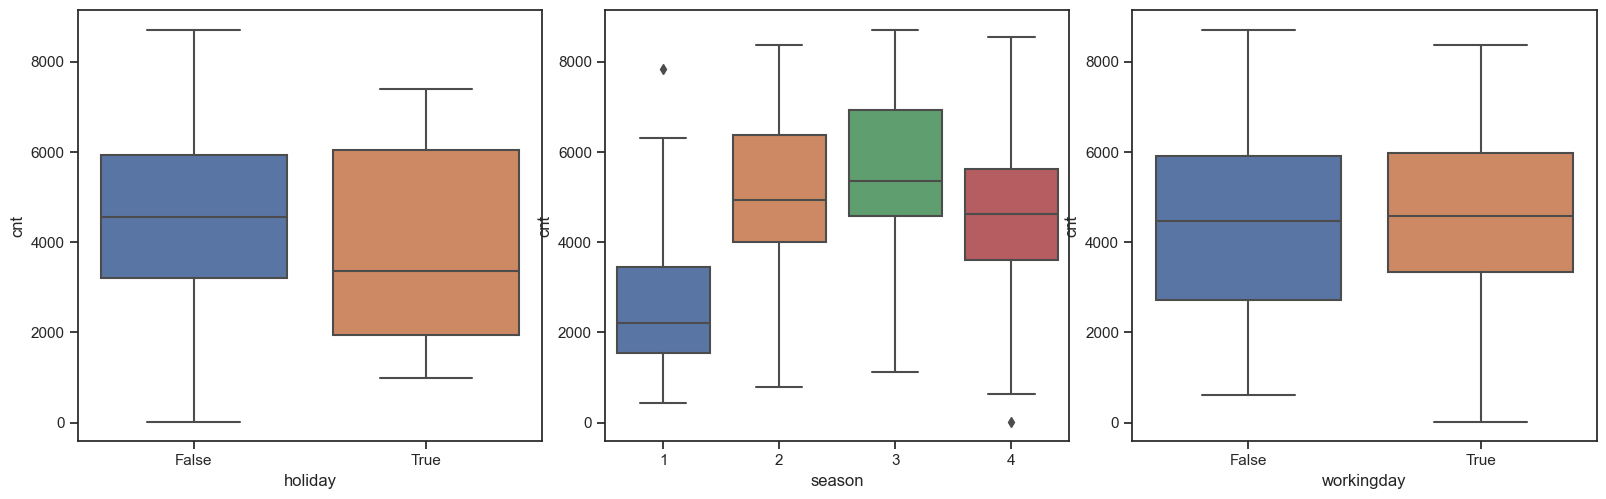

In [18]:
f, axes = plt.subplots(1, 3, figsize=(16,5))
f.tight_layout()

for i, feature in enumerate(['holiday', 'season', 'workingday']):
    sns.boxplot(x = feature, y="cnt", data=daily_data, ax=axes[i], order = sorted(daily_data[feature].unique()))

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

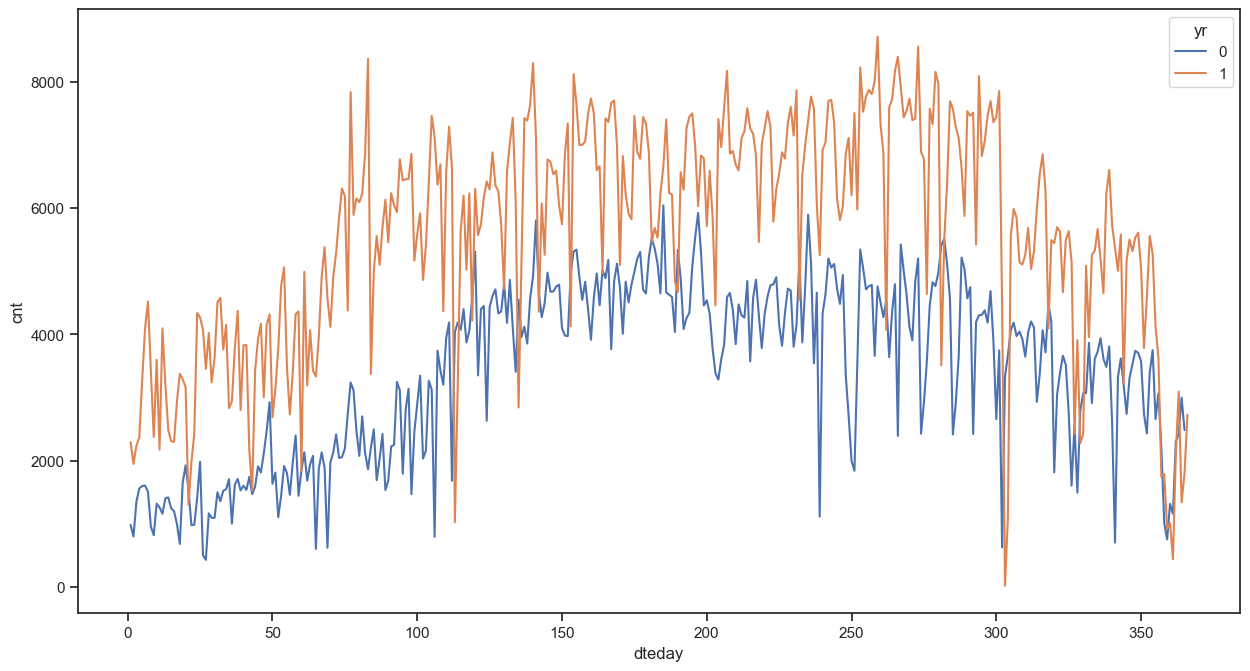

In [19]:
plt.figure(figsize=(15,8))
sns.lineplot(x=daily_data['dteday'].dt.dayofyear, y="cnt", hue="yr", data=daily_data)